In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

import warnings
warnings.filterwarnings('ignore')

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [  ]
Fi = 1 - 1/np.array(Tr)

In [3]:
COMPUTERNAME = os.environ['COMPUTERNAME']
print(f'Computer: {COMPUTERNAME}')

if COMPUTERNAME == 'BR_DELL':
    dir_font = os.path.join('/','run')
else:
    dir_font = os.path.join('/')

Computer: UNIPD_DELL


In [4]:
veneto_dir = os.path.join(dir_font,'media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [5]:
obs_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy','Rain_Gauges_QC')
dir_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy')

In [6]:
METADATA = pd.read_csv(os.path.join(obs_base, 'data', 'METADATA', 'METADATA_FTS_QCv4_Case1_wAIRHO_v3_1dy.csv'))
ISO_names = np.unique(METADATA.ISO.values)

In [7]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

In [8]:
dir_ =os.path.join(dir_font,'media','arturo','T9','Data','Italy')

DF_IMERG = ART_sta.get_relative_error('IMERG',dir_)
DF_CMORPH = ART_sta.get_relative_error('CMORPH',dir_)
DF_MSWEP = ART_sta.get_relative_error('MSWEP',dir_)
DF_ERA5 = ART_sta.get_relative_error('ERA5',dir_)
DF_GSMaP = ART_sta.get_relative_error('GSMaP',dir_)
DF_CHIRPS = ART_sta.get_relative_error('CHIRPS',dir_)

DF_ENSEMBLE_MEAN = ART_sta.get_relative_error('ENSEMBLE_ALL_mean',dir_)
DF_ENSEMBLE_MEDIAN = ART_sta.get_relative_error('ENSEMBLE_ALL_median',dir_)

## Relative Error Distribution

In [9]:
RSR_RAW_compare, RSR_DOWN_compare = ART_sta.Statistics_RAW_DOWN(DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS, DF_ENSEMBLE_MEAN, DF_ENSEMBLE_MEDIAN)

Text(0.07, 0.85, '(g)')

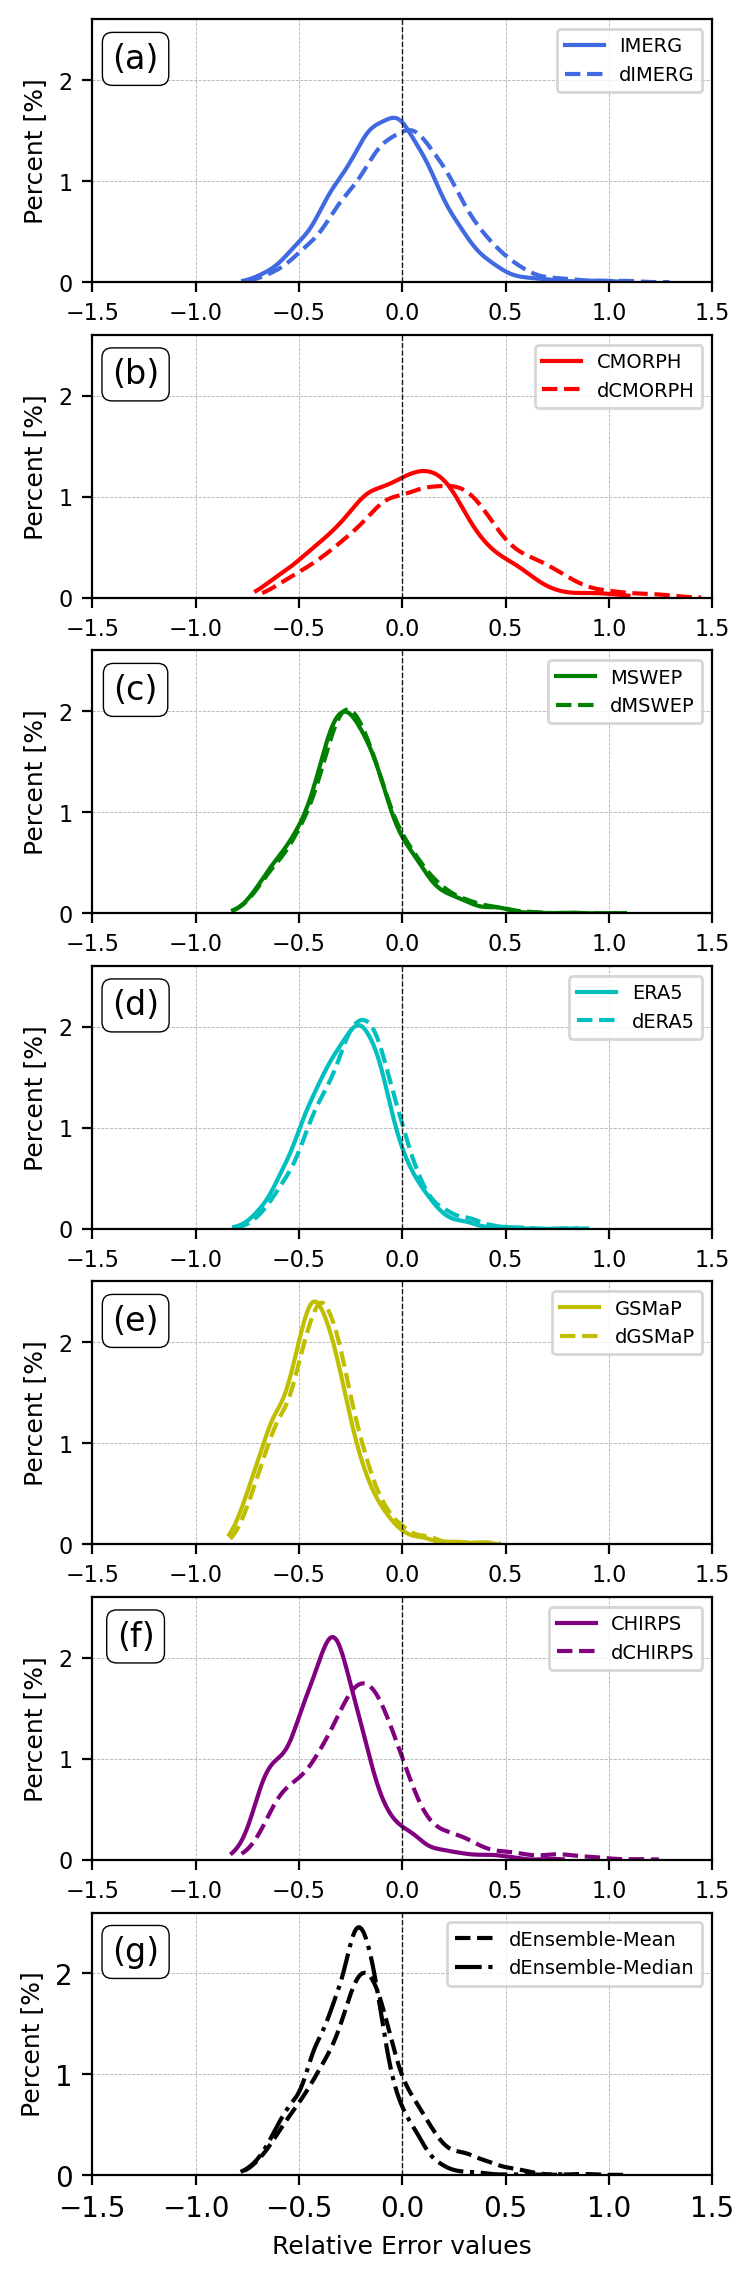

In [55]:
fig = plt.figure(figsize=(4,14),dpi=200)
gs = gridspec.GridSpec(7,1)

# =================================================================================
ax1 = plt.subplot(gs[0, 0])
sns.kdeplot(DF_IMERG.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RER)), np.nanmax(np.array(DF_IMERG.RER))))
sns.kdeplot(DF_IMERG.RED,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dIMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RED)), np.nanmax(np.array(DF_IMERG.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(a)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))


# =================================================================================
ax1 = plt.subplot(gs[1, 0])
sns.kdeplot(DF_CMORPH.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RER)), np.nanmax(np.array(DF_CMORPH.RER))))
sns.kdeplot(DF_CMORPH.RED,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dCMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RED)), np.nanmax(np.array(DF_CMORPH.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(b)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =================================================================================
ax1 = plt.subplot(gs[2, 0])
sns.kdeplot(DF_MSWEP.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RER)), np.nanmax(np.array(DF_MSWEP.RER))))
sns.kdeplot(DF_MSWEP.RED,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dMSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RED)), np.nanmax(np.array(DF_MSWEP.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(c)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =================================================================================
ax1 = plt.subplot(gs[3, 0])
sns.kdeplot(DF_ERA5.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RER)), np.nanmax(np.array(DF_ERA5.RER))))
sns.kdeplot(DF_ERA5.RED,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RED)), np.nanmax(np.array(DF_ERA5.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(d)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =================================================================================
ax1 = plt.subplot(gs[4, 0])
sns.kdeplot(DF_GSMaP.RER,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RER)), np.nanmax(np.array(DF_GSMaP.RER))))
sns.kdeplot(DF_GSMaP.RED+0.02,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dGSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RED)), np.nanmax(np.array(DF_GSMaP.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(e)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =================================================================================
ax1 = plt.subplot(gs[5, 0])
sns.kdeplot(DF_CHIRPS.RER,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RER)), np.nanmax(np.array(DF_CHIRPS.RER))))
sns.kdeplot(DF_CHIRPS.RED,color=colors[5], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dCHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RED)), np.nanmax(np.array(DF_CHIRPS.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
# ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(f)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))


# =================================================================================
ax1 = plt.subplot(gs[6, 0])
sns.kdeplot(DF_ENSEMBLE_MEAN.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dEnsemble-Mean',
            clip=(np.nanmin(np.array(DF_ENSEMBLE_MEAN.RED)), np.nanmax(np.array(DF_ENSEMBLE_MEAN.RED))))
sns.kdeplot(DF_ENSEMBLE_MEDIAN.RED,color='k', linestyle='-.',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'dEnsemble-Median',
            clip=(np.nanmin(np.array(DF_ENSEMBLE_MEDIAN.RED)), np.nanmax(np.array(DF_ENSEMBLE_MEDIAN.RED))))
ax1.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.6)
ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.set_xlabel('Relative Error values',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)

ax1.text(0.07, 0.85, '(g)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))


Text(0.55, 0.97, 'Correlation')

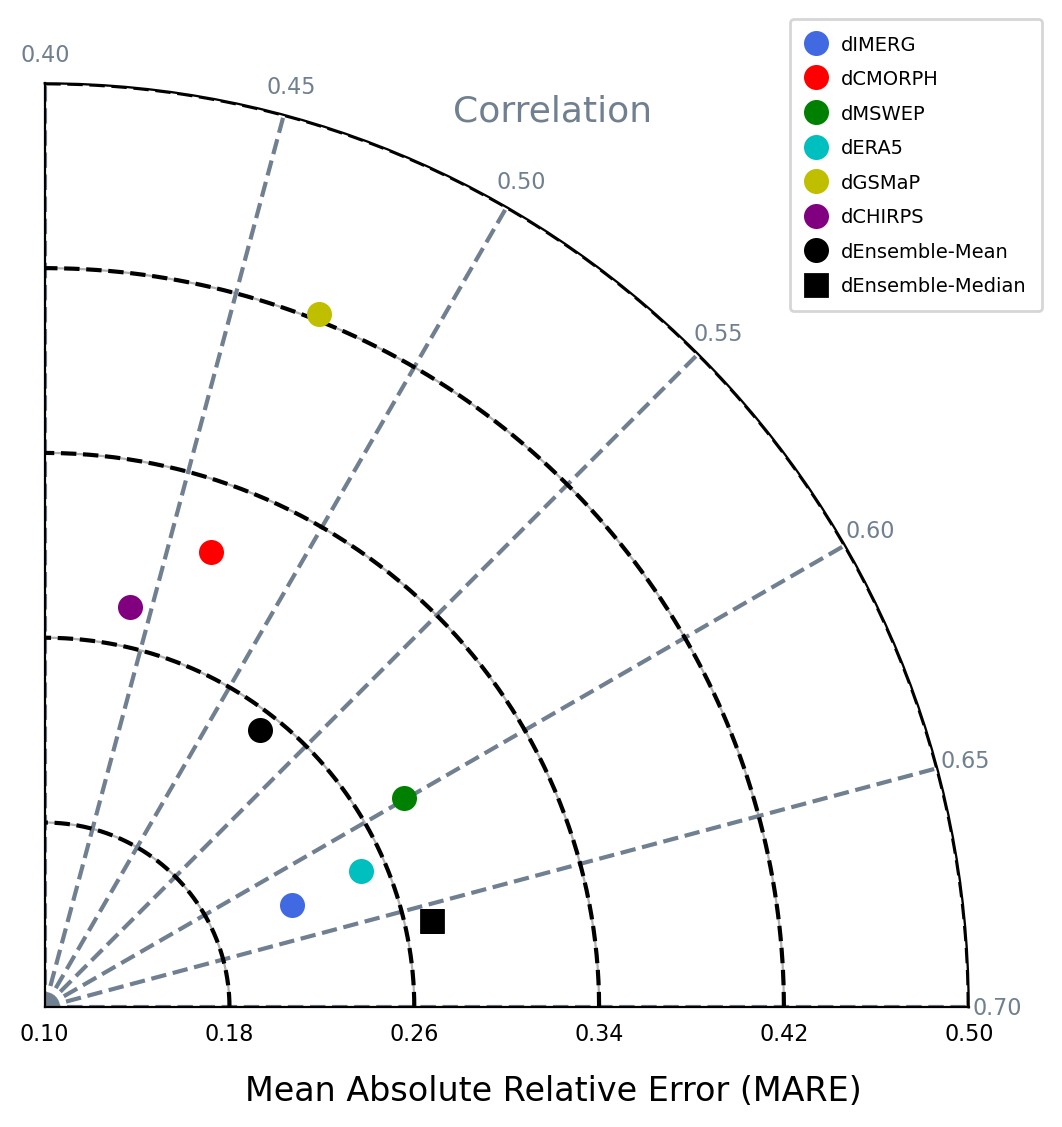

In [57]:
fig = plt.figure(figsize=(6,6),dpi=200)
gs = gridspec.GridSpec(1,1)

# =================================================================================
ax1 = plt.subplot(gs[0, 0], polar=True)

rmin = 0.1
rmax = 0.5

c_min = 0.4
c_max = 0.7

correlations = np.arange(c_min, c_max+0.05, 0.05)

for c in correlations:
    theta = (c_max - c) / (c_max - c_min) * (np.pi/2)
    ax1.plot([theta, theta], [rmin, rmax], color="slategrey", linestyle="--")
    ax1.text(theta, rmax * 1.025, f"{c:.2f}", ha="center", va="center",
            fontsize=8, color="slategrey")

# --- NUEVOS CÍRCULOS RADIALES DE MARE ---
radial_ticks = np.linspace(rmin, rmax, 6)
for r in radial_ticks:
    ax1.plot(np.linspace(0, np.pi/2, 200), np.ones(200)*r, color="k", linestyle="--")

# --- LIMPIEZA DE EJE ANGULAR ---
ax1.xaxis.set_visible(False)

# --- PUNTOS DE MODELOS ---
for rmse_val, corr_val, lab, co in zip(RSR_DOWN_compare.MARE.values, RSR_DOWN_compare.CORR.values, RSR_DOWN_compare.Dataset.values, colors):
    theta = (c_max - corr_val) / (c_max - c_min) * (np.pi/2)
    if lab == 'ENSEMBLE MEAN':
        ax1.plot(theta, rmse_val, 'o', markersize=8, label=f'dEnsemble-Mean', color='k')
    elif lab == 'ENSEMBLE MEDIAN':
        ax1.plot(theta, rmse_val, 's', markersize=8, label=f'dEnsemble-Median', color='k')
    else:
        ax1.plot(theta, rmse_val, 'o', markersize=8, label=f'd{lab}', color=co)

# --- LÍMITES Y DIRECCIÓN ---
ax1.set_thetamin(0)
ax1.set_thetamax(90)
ax1.set_theta_zero_location("E")
ax1.set_theta_direction(1)
ax1.set_rmin(rmin)
ax1.set_rmax(rmax)

# --- RADIAL TICKS ---
ax1.set_yticks(radial_ticks)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=2)
ax1.grid(True)

# plt.legend(fontsize=5, ncol=1, loc='upper right', bbox_to_anchor=(1.09, 1.08))
plt.legend(fontsize=7, 
            ncol=1, 
            loc='upper right', 
            bbox_to_anchor=(1.09, 1.08),
            handlelength=1.0,      # Longitud de la línea del símbolo
            handletextpad=0.8,     # Espacio entre símbolo y texto
            borderpad=0.8,         # Padding interno
            labelspacing=0.8)      # Espacio entre etiquetas

# --- LABELS ---
ax1.text(0.55, -0.09, "Mean Absolute Relative Error (MARE)", transform=ax1.transAxes,
        ha="center", va="center", fontsize=12)

ax1.text(0.55, 0.97, "Correlation", transform=ax1.transAxes,
        ha="center", va="center", rotation=0, fontsize=13, color='slategrey')
